# Heart Disease Predition

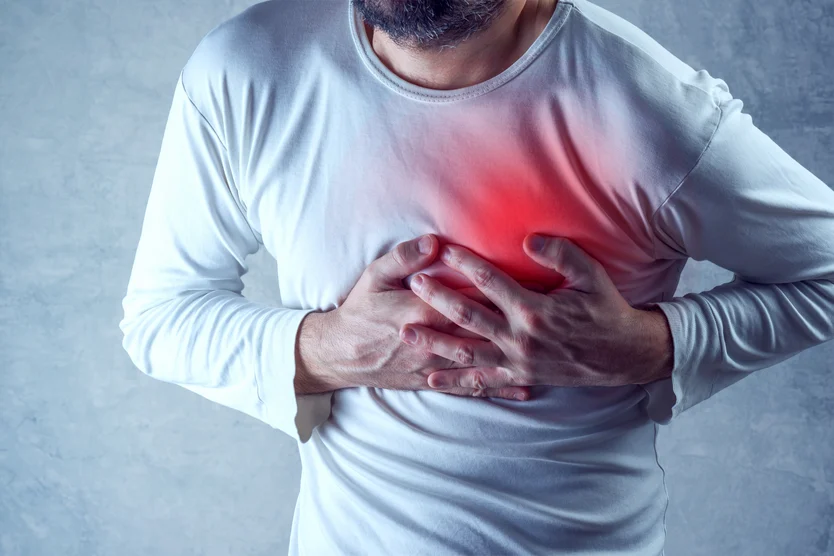

Scenario:
- At a Hospital with an alarming number of patients coming in reporting various cardiac symptoms. A cardiologist measures vitals & hands this data to Data Scientist to perform Data Analysis 
and predict whether certain patients have Heart Disease. 

Goal:
    
- Predict whether a patient have Heart Disease or not. This is a binary outcome.
- Positive (+) = 1, patient diagnosed with Heart Disease
- Negative (-) = 0, patient not diagnosed with Heart Disease



I have used Heart disease dataset that is freely available on kaggle

Columns in the dataset

- age 
- sex : 1= Male, 0= Female (Binary)
- (cp)chest pain type (4 values -Ordinal):Value 0: typical angina ,Value 1: atypical angina, Value 2: non-anginal pain , Value 3- - asymptomatic
- (trestbps) resting blood pressure 
- (chol) serum cholesterol in mg/dl 
- (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
- (restecg) resting electrocardiography result(values 0,1,2)
- (thalach) maximum heart rate achieved 
- (exang) exercise induced angina (binary) (1 = yes; 0 = no)
- (oldpeak) = ST depression induced by exercise relative to rest 
- (slope) of the peak exercise ST segment (Ordinal) (Value 0: up sloping , Value 1: flat , Value 2: down sloping )
- (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
- (thal) maximum heart rate achieved — (Ordinal): 1 = normal; 2 = fixed defect; 3 = reversible defect

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()
pd.set_option('display.max_column',None)

## Importing Dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df[df['target']==0].iloc[1,:]

age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64

In [4]:
df.shape

(1025, 14)

In [5]:
df.info()
# insight- No Null Values in data and no object variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("************"*10)

age
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
************************************************************************************************************************
sex
[1 0]
************************************************************************************************************************
cp
[0 1 2 3]
************************************************************************************************************************
trestbps
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
************************************************************************************************************************
chol
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 22

In [9]:
for i in df.columns:
    if df[i].nunique()<10:
        print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
        print('---------------------------------------------------------------------------------------')

The value counts for each value in sex column is/are :  
1    713
0    312
Name: sex, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in cp column is/are :  
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in fbs column is/are :  
0    872
1    153
Name: fbs, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in restecg column is/are :  
1    513
0    497
2     15
Name: restecg, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in exang column is/are :  
0    680
1    345
Name: exang, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each va

In [10]:
# In value count of 'thal' columns, there are seven times 0 is comming but 0 has no meaning in that column
# will solve this error by replacing 0 with 2 as 2 is more frequently comming in the column

In [11]:
df['thal'].replace(0,2,inplace=True)

In [12]:
df['thal'].value_counts()

2    551
3    410
1     64
Name: thal, dtype: int64

In [13]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [15]:
df.isnull().sum().sort_values(ascending = False)
# insight :- No null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 54.4 (9.1)min < med < max:29.0 < 56.0 < 77.0IQR (CV) : 13.0 (6.0),41 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACV0lEQVR4nO3dQY7aMBiG4d9lQAGkIDQV7LhApS5YcogetkcoEouuuQE7RIRApBMRQrrtoq0Ux1G+hPfZW+PFK8ZjY48ry9IAFZ/angDwp7e2JwAz59zYzEaew+9lWX6EnE+bCLJlzrnx+/v7tziO5z7jr9fr2Tn3vS9REmT7RnEczzebzcdsNsuqDLxcLtFut5snSTIyM4JEOLPZLFssFr88ho6DT6ZFBBlIjXVg/Hw+h6Hn01UEGUCddWCe51FRFF+yLPthZj6fkL1CkGF4rwMPh8N8v99PHo/HoKnJdQlBBuSzDjyfz71aA9bFxjikECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSk8OWKjiuKYmhmsXPOZ7jcfRyC7LA0TYd5nn9drVaDwWBQ6WtvZpr3cQiyw+73+1sURZP1ep0tl8tzlbGq93EIsgem02lv7uPwRw2kECSk9O5XNq9AdFuvguQViO7rVZBW8xWI7Xa7SJLks3PuWvHncrc6kL4FaWZ+t//q7OlxtzqcXgbpo86eHnerw5EMss1nSXz29LhbHY5ckDxL8trkgjSeJXlpikGaGc+SvCpOaiCFICGFICGFICGFICGFICGFICGFICGFICGFICGFICGFICGFICFF9ts+aJ7iu0AE+aJU3wVqLEj+O6o21XeBGgmSawjdofYuUFOfkFxDgJdG15BcQ0BVbPtACkFCCkFCCkFCChvj8NLUKQ9BorImT3n+GySnLfibJk95/hlkiNOW0+n0s+rY2+0WmZmlaRodj8cJY3XHNuE3/zSH9LaOu48AAAAASUVORK5CYII="">",0(0.0%)
2,sex[int64],Mean (sd) : 0.7 (0.5)min < med < max:0.0 < 1.0 < 1.0IQR (CV) : 1.0 (1.5),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaklEQVR4nO3cQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVClouu3CKIaKX+F5tsMfZvESyCJ/HYahQIq3V18Afpu9+gL8T7XWZSllPnH8exiG47UDQfKwWutyvV6/d123mjJ/OBw+a60f16IUJFPMu65bbbfbY9/3p0cGW2uL3W632u/381KKIPk7fd+fNpvN14TR5diBjxqiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkig31/E9a0sqjBkN8plbUmHMrTfk07akwpi7G3SfsSUVxvioIYogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKLc/S+7tbZ49KGttcX5fJ6VUrpa66SLEa27XC6zqW3cOv8BE0BOccYiUEkAAAAASUVORK5CYII="">",0(0.0%)
3,cp[int64],Mean (sd) : 0.9 (1.0)min < med < max:0.0 < 1.0 < 3.0IQR (CV) : 2.0 (0.9),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmklEQVR4nO3cQWoiQQCG0aogoptuRPAwHmIOm0N4GxnaxSQMaM9iFpMsYmINjb+d97ZNF7X4UMoqq47jWCDF070nAG8trj2sta5LKcvGsX+P4/jS+C7f1IdB1lrX2+32R9d1m5aBT6fTz1rrsyi5xbVPyGXXdZv9fv/S9/3rLYMOw7A6HA6b4/G4LKUIki+7+pVdSil937/udrtfDWOvG97hm7OoIYogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIny6d9gmZ4bQv4R5J25IeQ9Qd6fG0LeEGQIN4T8ZVFDFEESRZBEESRRBEkUQRJFkEQRJFEESRRBEkWQRJndXrajXI9tVkE6yvX4ZhVkcZTr4c0tyFKKo1yPzKKGKIIkiiCJIkiiCJIogiSKIIkyy98hmd5UW7SC5GZTbtEKkhaTbdEKkmZTbNFa1BBFkEQRJFEESRRBEuXTVfYwDKtbBx2GYXU+nxellK7W2jSxRt3lclmY8+T+a87Xnv8BCNefe55RxMAAAAAASUVORK5CYII="">",0(0.0%)
4,trestbps[int64],Mean (sd) : 131.6 (17.5)min < med < max:94.0 < 130.0 < 200.0IQR (CV) : 20.0 (7.5),49 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjUlEQVR4nO3cu47aQBSA4TOwEHORMUKBjiYFRaQUlDxEHjaPkIIHQLQUER3iIiMcHIxxmpWSjQQr2+P1iff/+hEuftkcX8YkSSKAFrWyDwD421PZB2CbMaYlIs2Myy9JkpxtHg/SqVSQxpjWYDD46rpuP8v64/F4MMZ8I8ryVCpIEWm6rtufzWbnXq8Xplno+74zn8/7u92uKSIEWZKqBSkiIr1eLxwOhz8zLG1ZPxikwlADVVSeIXMMJu7tdmvYPh68HXVB5hlMoihy4jj+HIbhdxHJcslGydQFKTkGk/V63V8ul+3r9Vov6uBQLI1Biki2weRwODCU/OcYaqAKQUIVgoQqBAlVCBKqqJ2yyxDHcUNEXGNMluW8KWQBQT4LgqARRdGX8Xhcr9frqe5/ivCmkC0E+exyuTw5jtOeTqfhaDQ6pFnLm0L2EOQ/Op0ObwqViKEGqhAkVCFIqEKQUIUgoQpBQhWChCoECVUIEqoU9qSGLweRRSFB8uUgsirqDMmXg8ik0Jcr+HIQaTHUQBWChCoECVUIEqoQJFQhSKhCkFCFIKEKXx1awiYDdhCkBWwyYA9BWsAmA/YQpEVsMpAfQw1UIUioQpBQhSChCkFCFYKEKgQJVQgSqnBjXAGeg/9BkCXjOfhLD4Nk94ni8Rz8pbtBsvvE28r6HDyOY1cqdLl/dIZk9wnlqni5f/U/JLtP6FXFyz1DTQVU6bU37kN

## EDA (Exploratory Data Analysis)

### Univariate Analysis And Bivariate Analysis

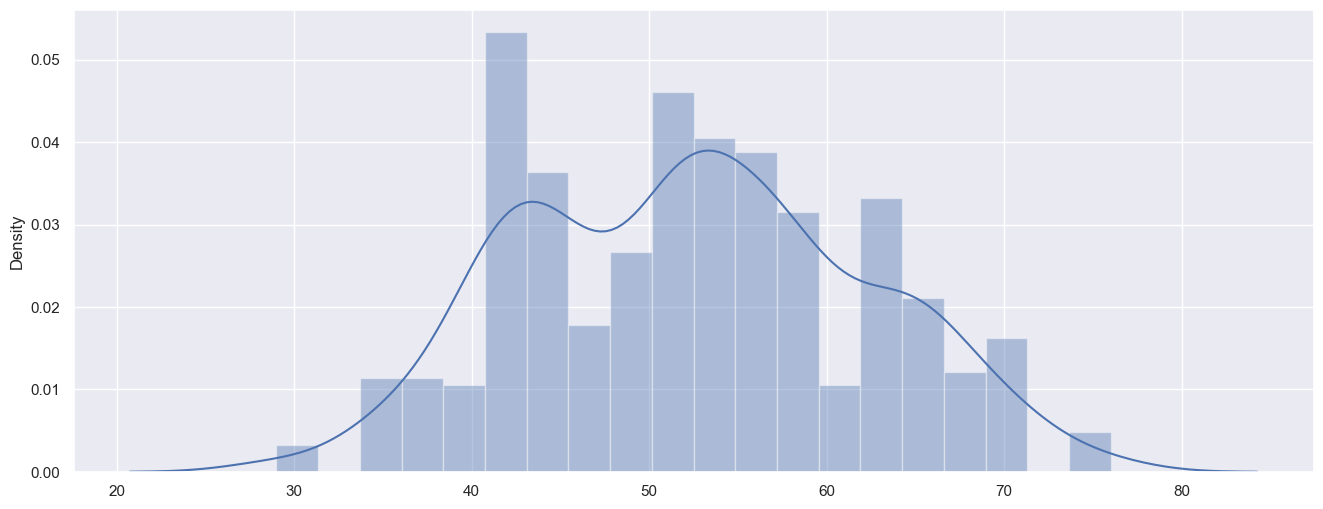

In [17]:
#plot the Age distribution
plt.figure(figsize = (16,6))
sns.distplot( df.loc[df['target'] == 1, 'age'].values,bins = 20)
plt.show()


Insight
- People having heart disease are mostly in the age group 50 to 60
- Below 40 people  less chances of having heart disease

In [18]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

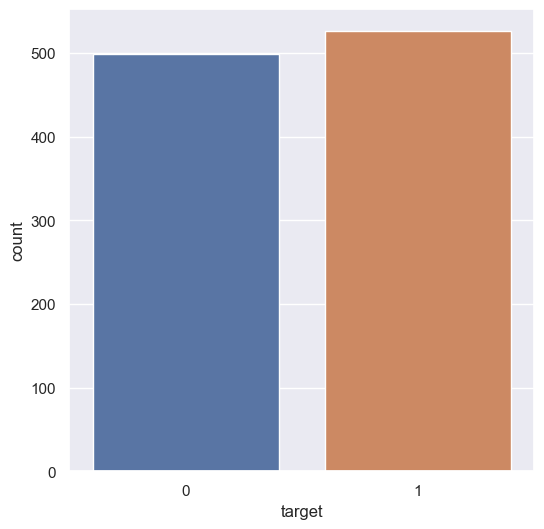

In [19]:
plt.figure(figsize= (6,6))
sns.countplot(data=df, x='target')


Insight
- dataset is balanced

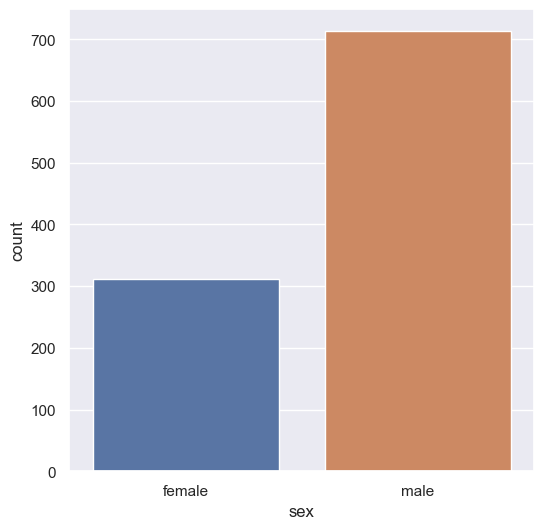

In [20]:
plt.figure(figsize= (6,6))
sns.countplot(data = df,x= 'sex')
plt.xticks([0, 1], ['female', 'male'])
plt.show()

Insight: dataset have more male data

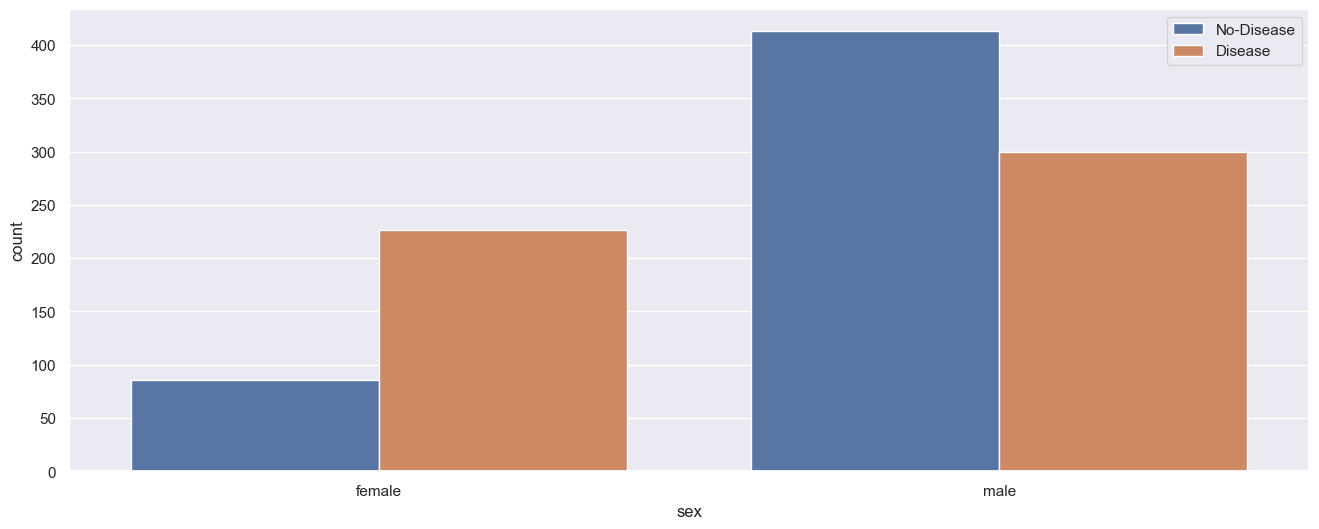

In [21]:
plt.figure(figsize= (16,6))
sns.countplot(x='sex',data = df,hue = 'target')
plt.xticks([0,1],['female','male'])
plt.legend(labels =['No-Disease','Disease'])
plt.show()

In [22]:
per_0=df.loc[(df['target']==1) & ( df['sex']==0),'sex'].value_counts()[0]/df.loc[df['sex']==0,'sex'].value_counts()[0]*100
per_0 =  round(per_0, 2)
print(f"Out of total female {per_0}% of females are having heart disease")

Out of total female 72.44% of females are having heart disease


In [23]:
per_1=df.loc[(df['target']==1) & ( df['sex']==1),'sex'].value_counts()[1]/df.loc[df['sex']==1,'sex'].value_counts()[1]*100
per_1 =  round(per_1, 2)
print(f"Out of total male {per_1}% of males are having heart disease")

Out of total male 42.08% of males are having heart disease


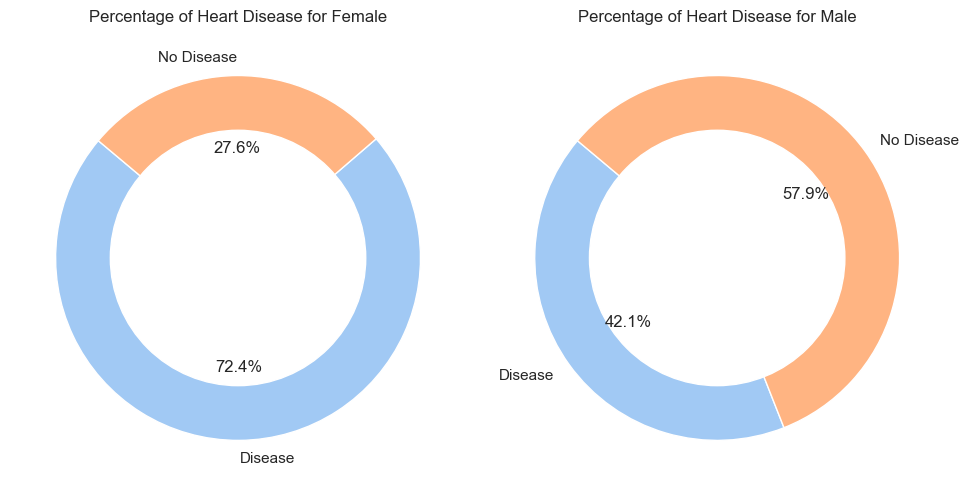

In [24]:
# Create the pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Pie chart for sex=0
axs[0].pie([per_0, 100-per_0], labels=['Disease', 'No Disease'], autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
axs[0].title.set_text('Percentage of Heart Disease for Female')
circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
axs[0].add_artist(circle)

# Pie chart for sex=1
axs[1].pie([per_1, 100-per_1], labels=['Disease', 'No Disease'], autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
axs[1].title.set_text('Percentage of Heart Disease for Male')
circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
axs[1].add_artist(circle)

plt.tight_layout()
plt.show()

In [25]:
#df.loc[(df['target']==1)&(df['cp']==2),'cp'].value_counts()[2]/df.loc[df['target']==1,'cp'].value_counts().sum()*100

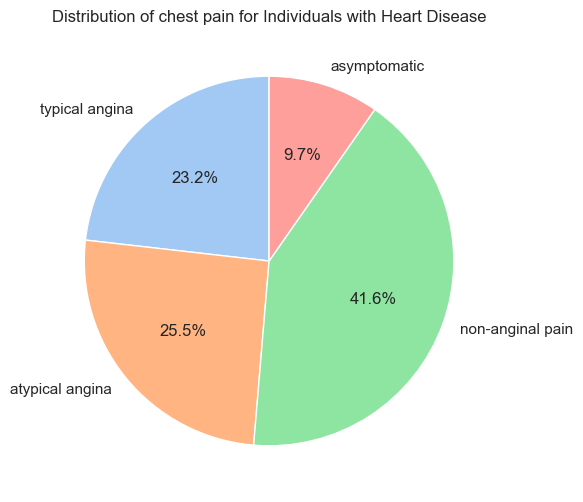

In [26]:
# Count occurrences of each chest pain type for individuals with heart disease (target == 1)
cp_counts = df.loc[df['target'] == 1]['cp'].value_counts().sort_index()
labels = ['typical angina','atypical angina','non-anginal pain','asymptomatic']

# Plotting the pie chart with the column name as the title
plt.figure(figsize=(6, 6))
plt.pie(cp_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title(f'Distribution of chest pain for Individuals with Heart Disease')
plt.show()


Insight
- The prevalence of non-anginal pain is notably high among individuals with heart disease

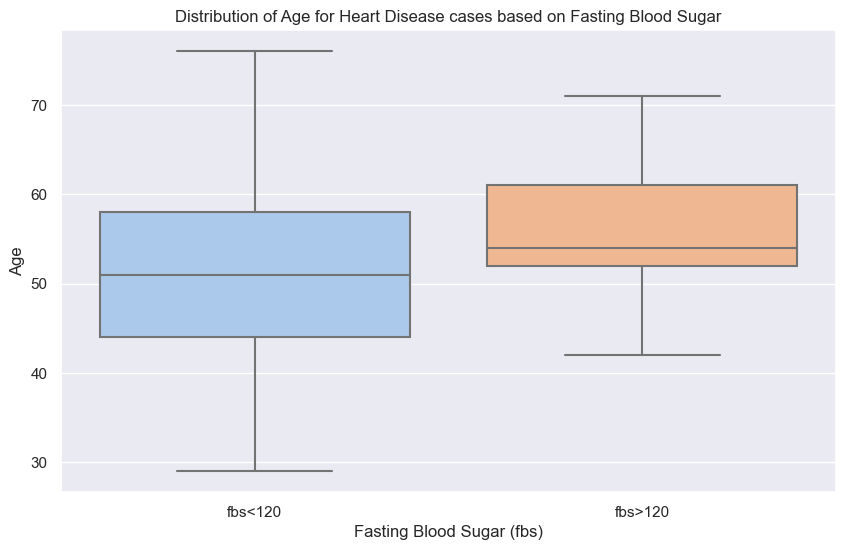

In [27]:
# Create a box plot on fbs vs age
plt.figure(figsize=(10, 6))
sns.boxplot(x='fbs', y='age', data=df[df['target'] == 1], palette='pastel')
plt.title('Distribution of Age for Heart Disease cases based on Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Age')
plt.xticks([0,1],['fbs<120','fbs>120'])
plt.show()

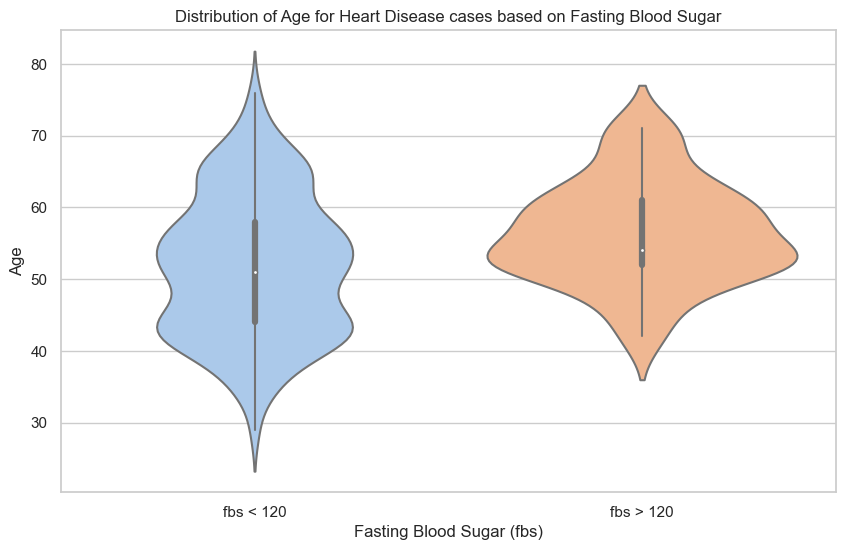

In [28]:
# Set the plot style
sns.set(style="whitegrid")

# Create a violin plot on fbs vs age
plt.figure(figsize=(10, 6))
sns.violinplot(x='fbs', y='age', data=df[df['target'] == 1], palette='pastel', split=True)
plt.title('Distribution of Age for Heart Disease cases based on Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Age')
plt.xticks([0, 1], ['fbs < 120', 'fbs > 120'])
plt.show()


Insight
- Individuals with heart disease and fasting blood sugar (fbs) levels greater than 120 mg/dL are predominantly in the age group of 50 to 60 years

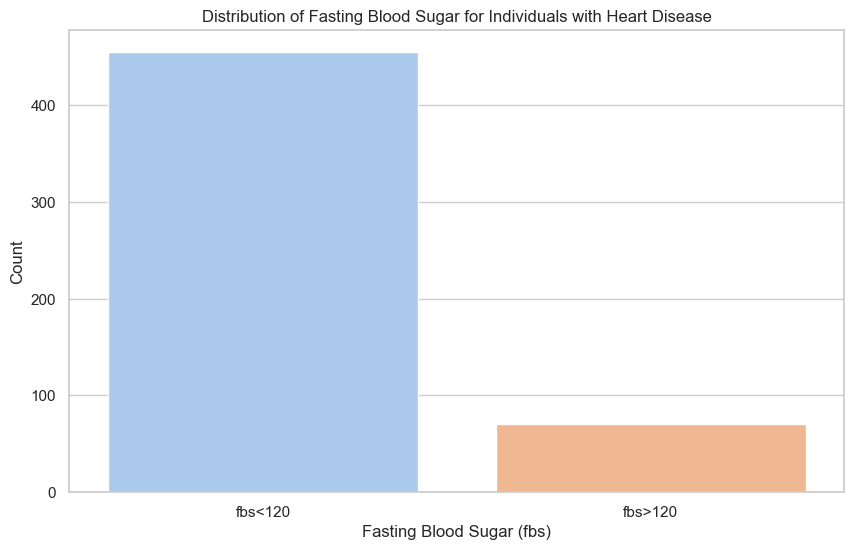

In [29]:
# Create a count plot for 'fbs' values for individuals with heart disease (target == 1)
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['target'] == 1], x='fbs', palette='pastel')
plt.title('Distribution of Fasting Blood Sugar for Individuals with Heart Disease')
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Count')
plt.xticks([0,1],['fbs<120','fbs>120'])
plt.show()


Insight:
- In most of the the cases patent having heart disease have fbs value lower than 120

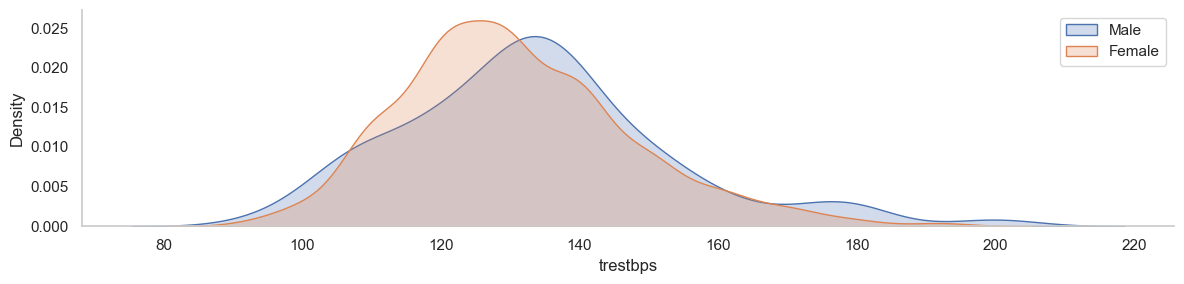

In [30]:
# Create a FacetGrid using seaborn, with 'sex' as the hue
g = sns.FacetGrid(data= df,hue = 'sex',aspect = 4)
g.map(sns.kdeplot,'trestbps',shade = True)
plt.legend(labels = ['Male','Female'])
plt.grid(False)
plt.show()


Insight 
- Female have less blood press as compared to men

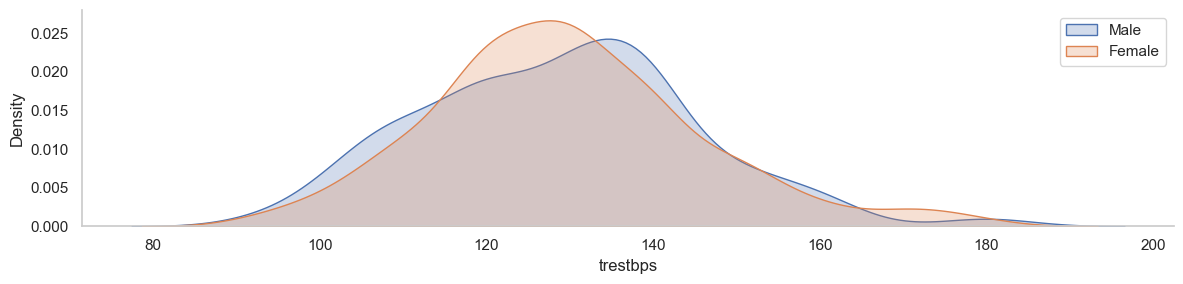

In [31]:
# Create a FacetGrid using seaborn, with 'sex' as the hue
g = sns.FacetGrid(data= df.loc[df['target']==1],hue = 'sex',aspect = 4)
g.map(sns.kdeplot,'trestbps',shade = True)
plt.legend(labels = ['Male','Female'])
plt.grid(False)
plt.show()


Insight
- Male having heart disease have high blood preesure as compared to female having heart disease

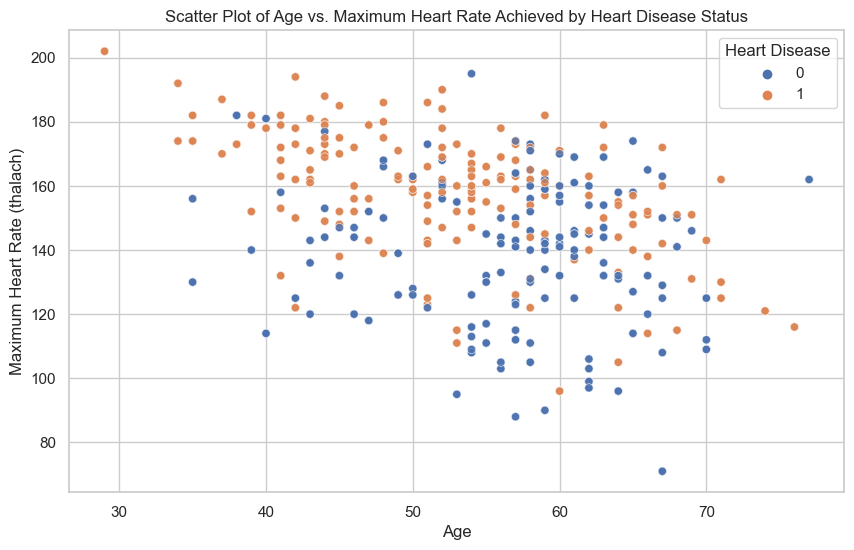

In [32]:
# Create a scatter plot for age vs. maximum heart rate achieved (thalach)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, alpha=0.7)
plt.title('Scatter Plot of Age vs. Maximum Heart Rate Achieved by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Heart Disease',)
plt.show()


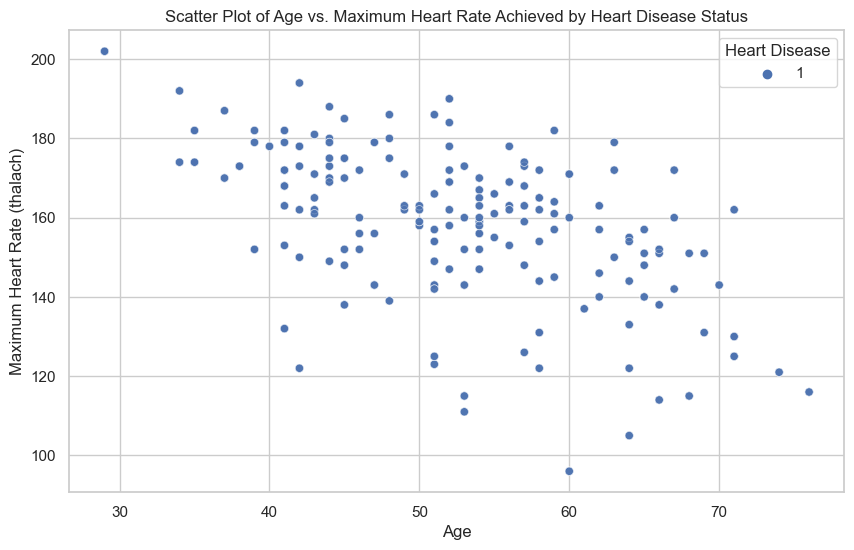

In [33]:
# Create a scatter plot for age vs. maximum heart rate achieved (thalach)
# when patent have a heart disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df.loc[df['target']==1], alpha=0.7)
plt.title('Scatter Plot of Age vs. Maximum Heart Rate Achieved by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Heart Disease',)
plt.show()


Insight:
- weak negative corelation is there
- most of the patents haing heart diease have  heart rate lies between 140 to 180
- patents having age< 40 and having high heart rate around 170 to 200 they are likely to have heart disease 


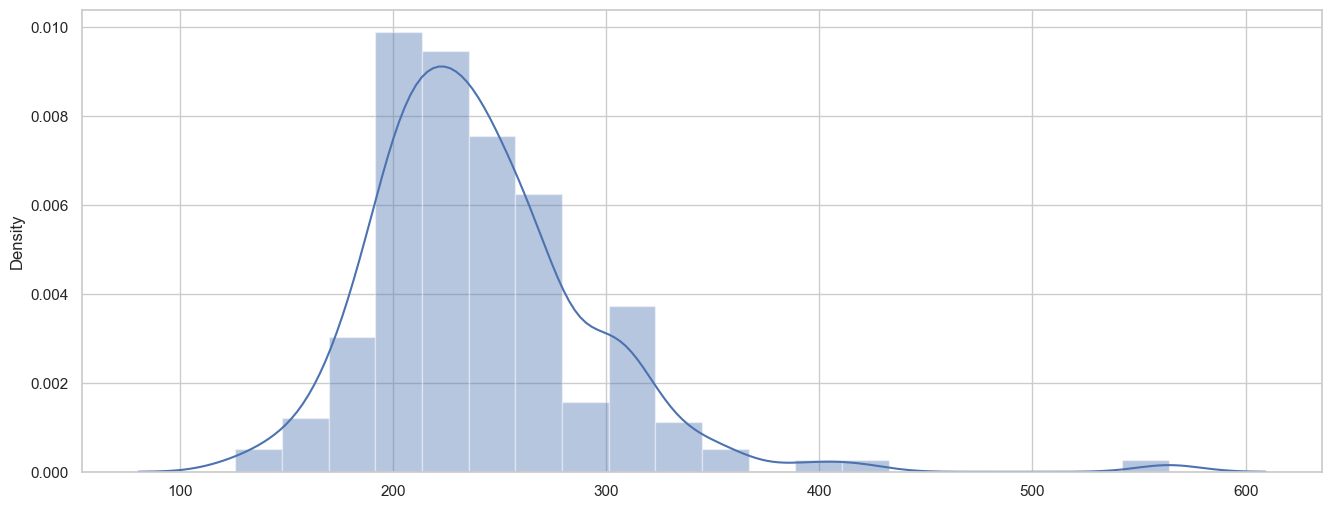

In [34]:
#plot the chol distribution
plt.figure(figsize = (16,6))
sns.distplot( df.loc[df['target'] == 1, 'chol'].values,bins = 20)
plt.show()

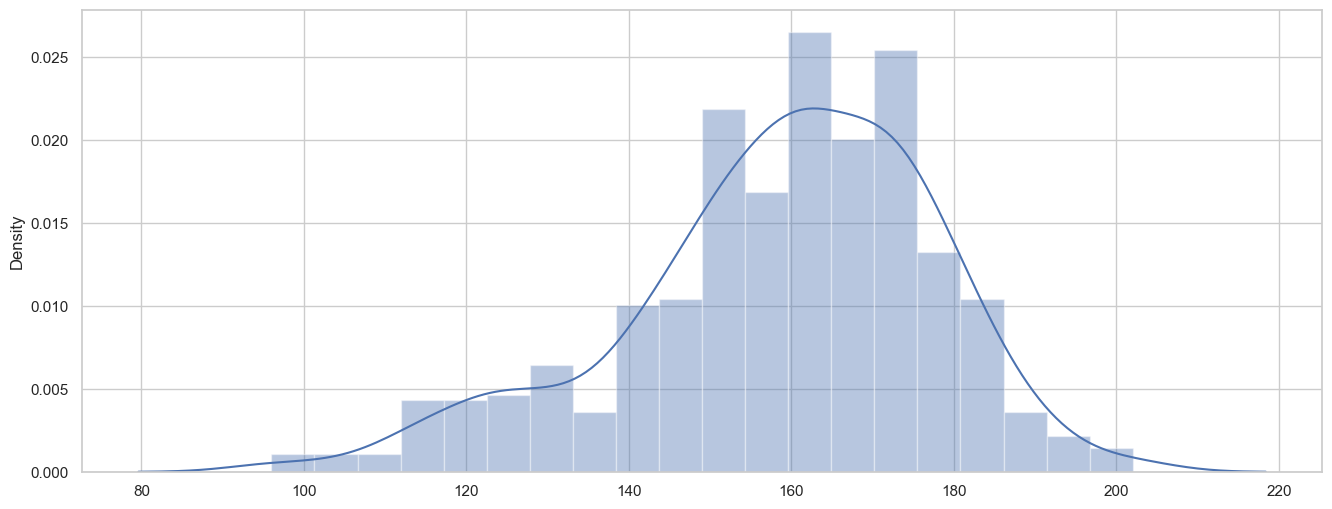

In [35]:
#plot the thalach distribution
plt.figure(figsize = (16,6))
sns.distplot( df.loc[df['target'] == 1, 'thalach'].values,bins = 20)
plt.show()

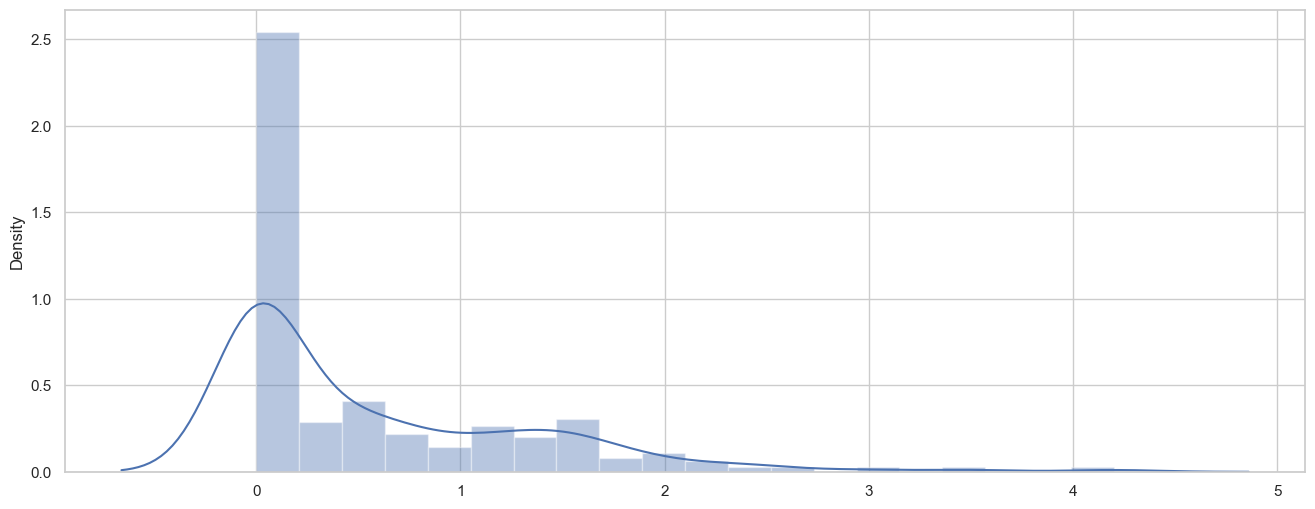

In [36]:
#plot the oldpeak distribution
plt.figure(figsize = (16,6))
sns.distplot( df.loc[df['target'] == 1, 'oldpeak'].values,bins = 20)
plt.show()

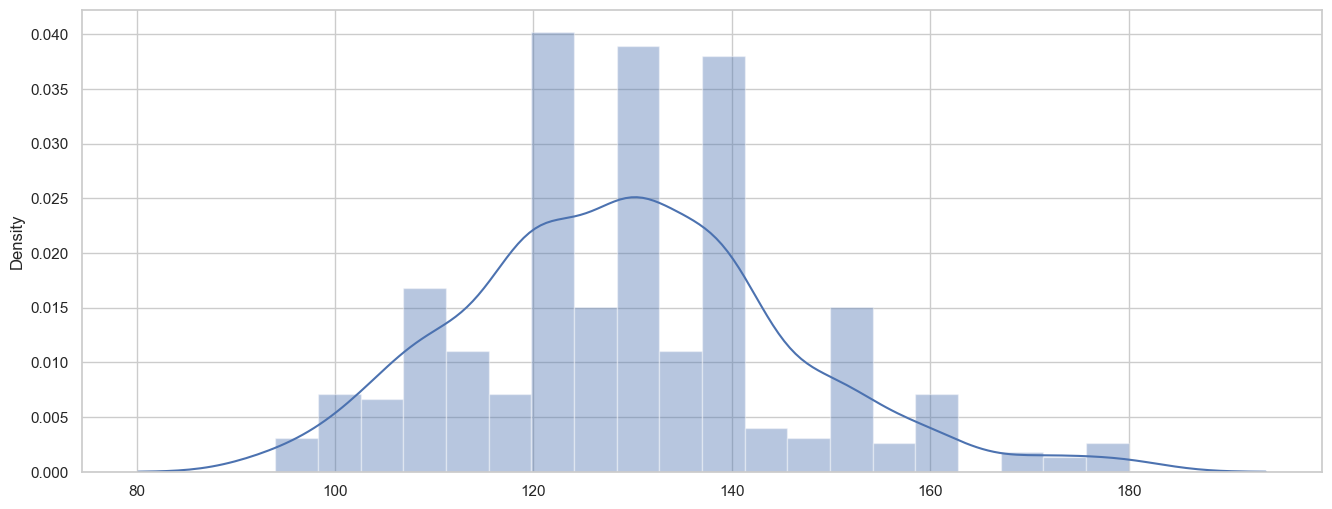

In [37]:
#plot the trestbps distribution
plt.figure(figsize = (16,6))
sns.distplot( df.loc[df['target'] == 1, 'trestbps'].values,bins = 20)
plt.show()

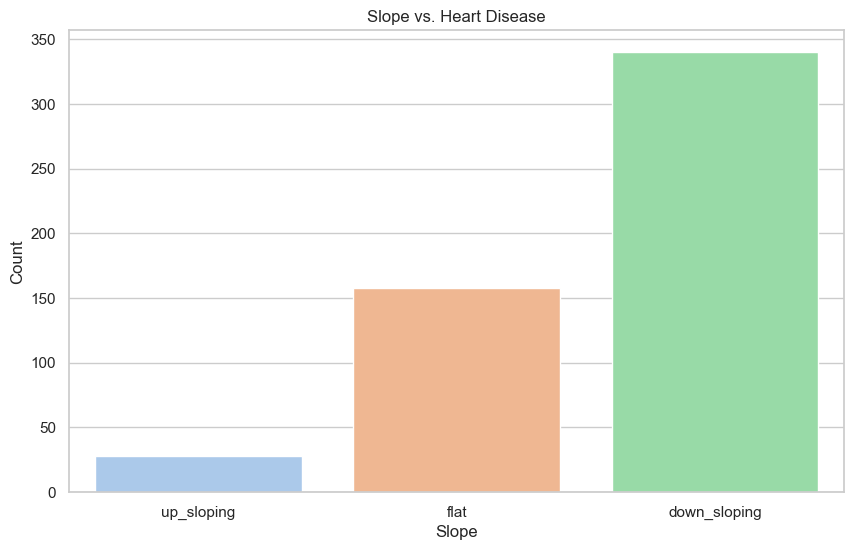

In [38]:
# count plot of slope
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['target'] == 1], x='slope', palette='pastel')
plt.title('Slope vs. Heart Disease')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.xticks([0,1,2],['up_sloping','flat','down_sloping'])
plt.show()

Insight:
- The majority of individuals exhibiting a down-sloping pattern are found to have heart disease.

## Multivariate Analysis

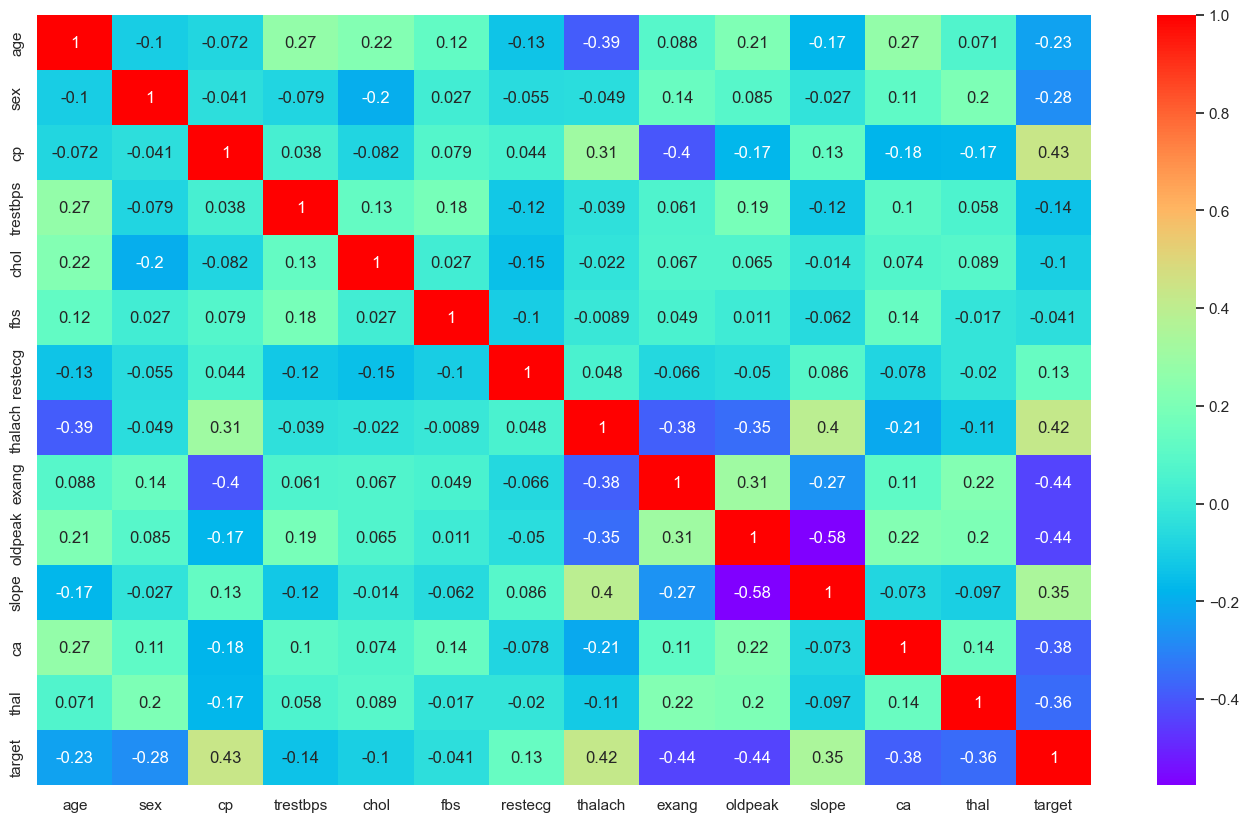

In [39]:
plt.figure(figsize =(17,10))
sns.heatmap(df.corr(),annot=True, cmap='rainbow')
plt.show()

Insight: No strong correlation is found in the heatmap

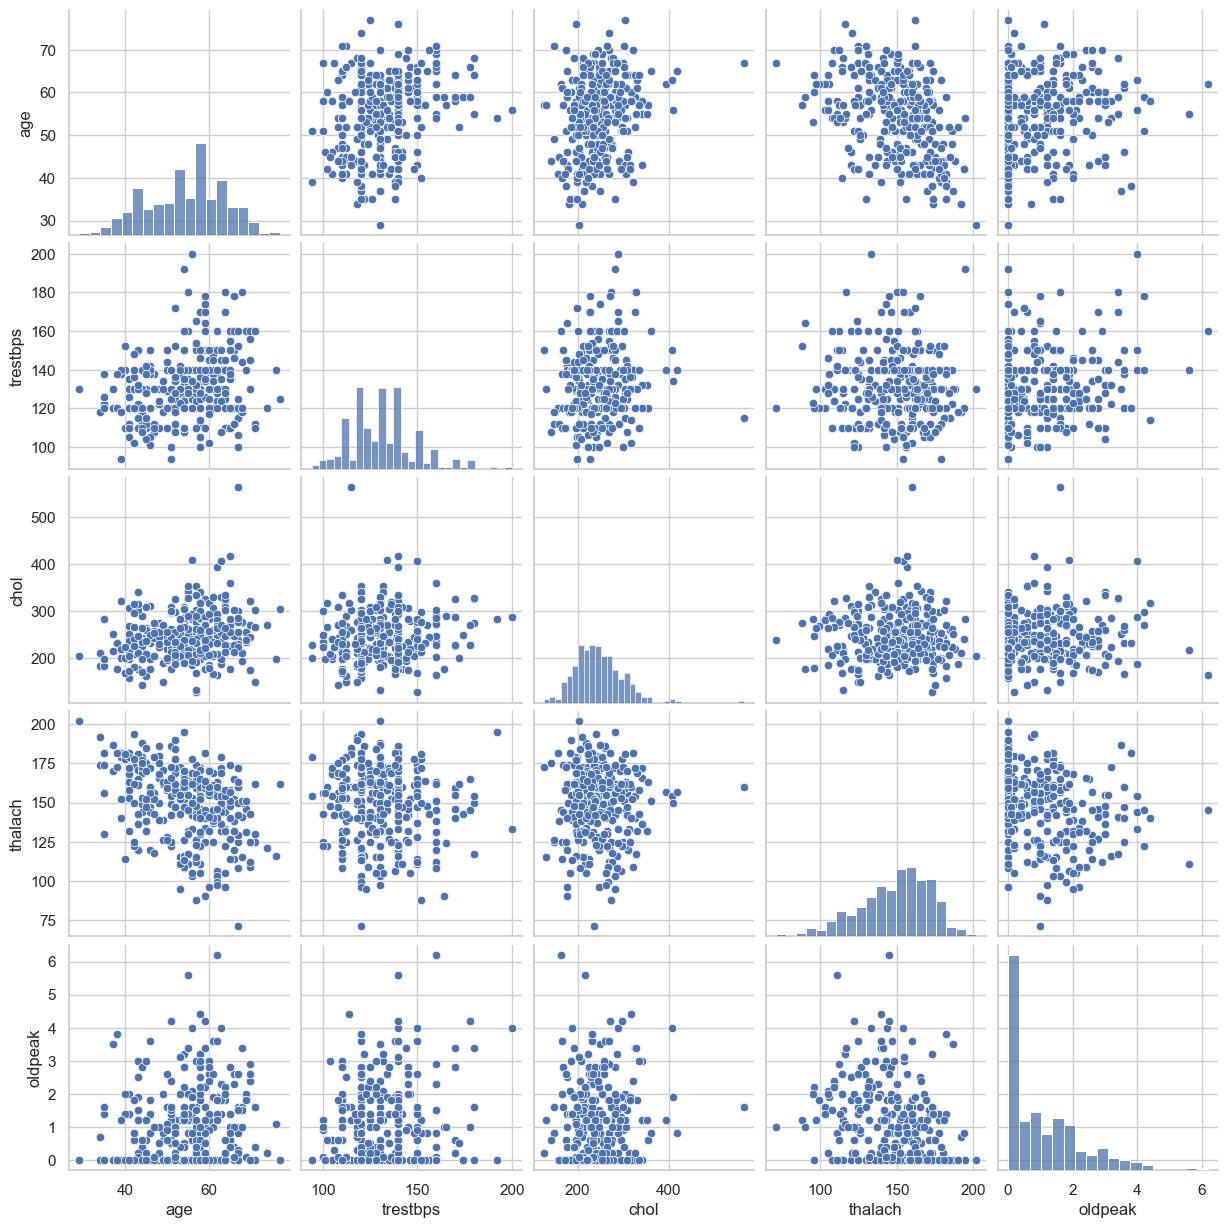

In [40]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

In [41]:
import dtale

In [42]:
dtale.show(df)

## Data Preprocessing

In [43]:
# no missing values
# data is already encoded 

In [44]:
# Splitting in dependent and independent variable
x = df.drop('target',axis = 1)
y= df[['target']]


## Outlier Detection and Treatment

age


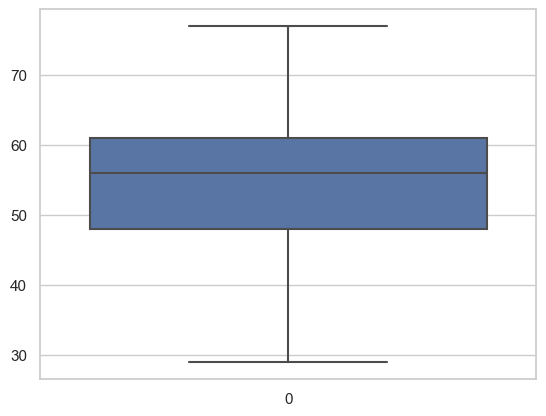

trestbps


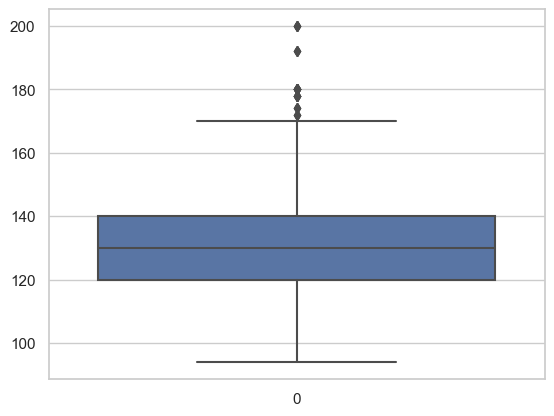

chol


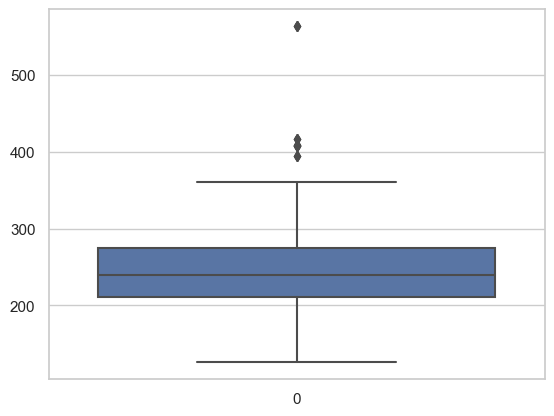

thalach


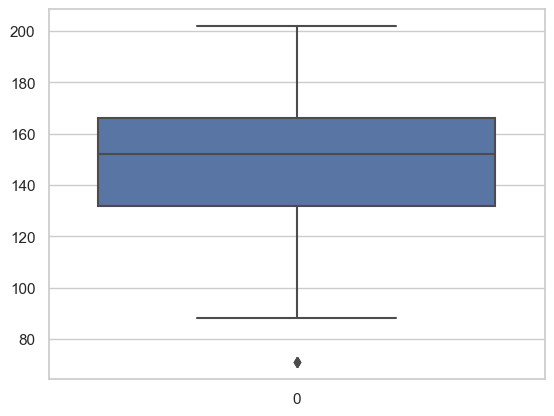

oldpeak


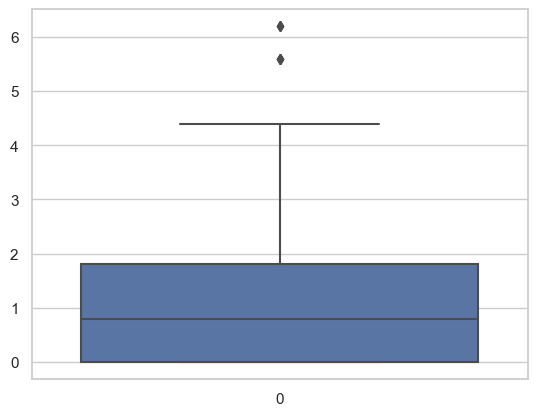

In [45]:
lst_cont_var = []
lst_char_var = []
for i in df.columns:
    if df[i].nunique()>10:
        lst_cont_var.append(i)
    else:
        lst_char_var.append(i)
# Detection
for i in lst_cont_var:

    print(i)
    sns.boxplot(x[i])
    plt.show()
   

Insight: 
- If we check the central tendency and the outlier of box plot there is not much scale difference
- hence there is no outlier

## Splitting Data in Train and Test

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(768, 13) (257, 13) (768, 1) (257, 1)


## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

df_x_train = pd.DataFrame(data= x_train_sc,columns = x_train.columns)
df_x_test = pd.DataFrame(data= x_test_sc,columns = x_test.columns)

In [48]:
# Saving feature scaling model to use it when deploying
import joblib
joblib.dump(sc,'sc_heart.pkl')
print('model Saved')

model Saved


## Model Building

### KNN Classifier

In [49]:
# Knn classifier
# Finding Best Value for k
# Knn is known best for clinical sector dataset
from sklearn.neighbors import KNeighborsClassifier

In [50]:

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  

    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(df_x_train, y_train)
    pred_i = classifier.predict(df_x_test)
    error.append(np.mean(pred_i != y_test.squeeze()))

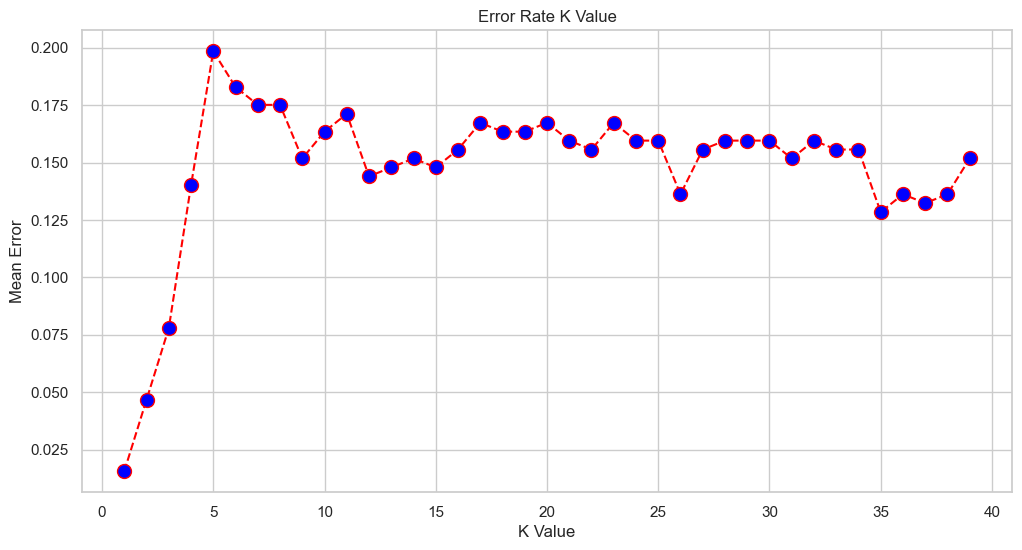

In [51]:

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()


In [52]:
# Appling the best k value
classifier = KNeighborsClassifier(n_neighbors=13)  
classifier.fit(x_train, y_train)  
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [53]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[262 109]
 [ 89 308]]
********************************************************************************
[[82 46]
 [34 95]]


In [54]:
print(classification_report(y_train, y_pred_train))
print("****************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       371
           1       0.74      0.78      0.76       397

    accuracy                           0.74       768
   macro avg       0.74      0.74      0.74       768
weighted avg       0.74      0.74      0.74       768

********************************************************************************
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       128
           1       0.67      0.74      0.70       129

    accuracy                           0.69       257
   macro avg       0.69      0.69      0.69       257
weighted avg       0.69      0.69      0.69       257



In [55]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.7421875
********************************************************************************
Test Accuracy : 0.688715953307393


In [56]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(classifier, x_train, y_train, cv=10)
test_accuracy = cross_val_score(classifier, x_test, y_test, cv=10)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())


Training Accuracy after CV : 0.7148496240601503
*******************************************************************************************************************
Test Accuracy after CV : 0.6926153846153846


In [57]:
# Accuracy is very less with KNN

### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train_sc, y_train)
y_pred_train_rfc = rfc.predict(x_train_sc)
Train_acc = accuracy_score(y_train, y_pred_train_rfc)
y_pred_test_rfc = rfc.predict(x_test_sc)
Test_acc = accuracy_score(y_test, y_pred_test_rfc)
print(f'Train_Accuracy :{Train_acc.round(2)*100} %, \nTest_Accuracy :{Test_acc.round(2)*100} %')

Train_Accuracy :100.0 %, 
Test_Accuracy :99.0 %


In [59]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfc, x_train_sc, y_train, cv=10)
test_accuracy = cross_val_score(rfc, x_test_sc, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())


0.9895933014354066

0.9070769230769231


In [60]:
# Finding Best n_estimator value 

# Set warm_start and oob_score parameters for the RandomForestClassifier
rfc.set_params(warm_start=True, oob_score=True)

# Define the range of the number of estimators (trees) to be tested
min_estimators = 216
max_estimators = 1000

# Dictionary to store the out-of-bag (oob) error rates for different numbers of estimators
error_rate = {}

# Iterate over different numbers of estimators
for i in range(min_estimators, max_estimators + 1):
    # Set the number of estimators for the RandomForestClassifier
    rfc.set_params(n_estimators=i)

    # Fit the model on the training data
    rfc.fit(x_train, y_train)

    # Calculate the out-of-bag (oob) error rate
    oob_error = 1 - rfc.oob_score_

    # Store the oob error rate in the dictionary for the current number of estimators
    error_rate[i] = oob_error


In [61]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
oob_series

216     0.010417
217     0.010417
218     0.010417
219     0.010417
220     0.010417
          ...   
996     0.010417
997     0.010417
998     0.010417
999     0.010417
1000    0.010417
Length: 785, dtype: float64

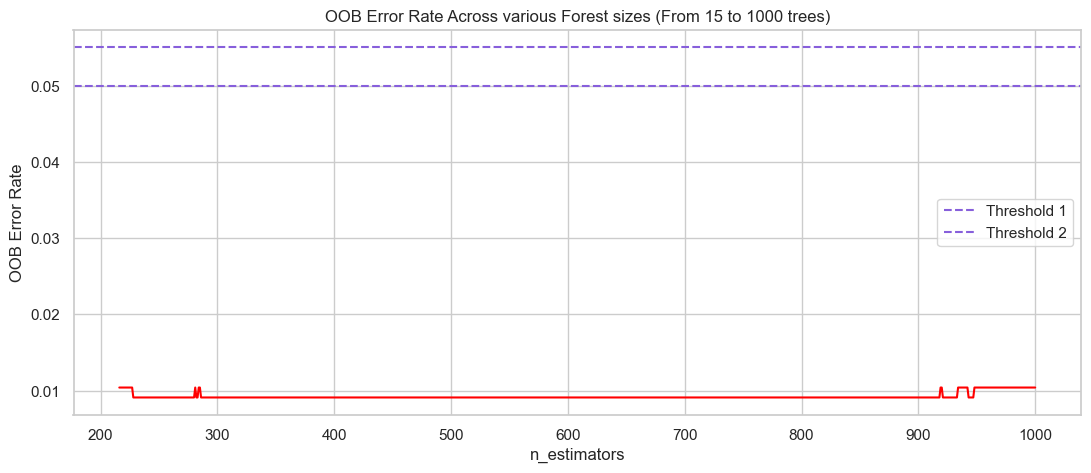

In [62]:
# Plotting oob error on different estimators
fig, ax = plt.subplots(figsize=(13, 5))
oob_series.plot(kind='line', color='red', ax=ax)

# plotting the threshold line at 0.5
plt.axhline(y=0.055, color='#875FDB', linestyle='--', label='Threshold 1')
plt.axhline(y=0.05, color='#875FDB', linestyle='--', label='Threshold 2')

plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')
plt.legend()  

plt.show()


In [63]:
# updating n_estimator value
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(x_train_sc, y_train)
y_pred_train_rfc = rfc.predict(x_train_sc)
Train_acc = accuracy_score(y_train, y_pred_train_rfc)
y_pred_test_rfc = rfc.predict(x_test_sc)
Test_acc = accuracy_score(y_test, y_pred_test_rfc)
print(f'Train_Accuracy :{Train_acc.round(2)*100} %, \nTest_Accuracy :{Test_acc.round(2)*100} %')

Train_Accuracy :100.0 %, 
Test_Accuracy :100.0 %


In [64]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfc, x_train_sc, y_train, cv=10)
test_accuracy = cross_val_score(rfc, x_test_sc, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())



0.9895933014354066

0.9186153846153846


In [65]:
print(classification_report(y_train, y_pred_train_rfc))
print("****************"*5)
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       397

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768

********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       129

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [66]:
print(confusion_matrix(y_train, y_pred_train_rfc))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test_rfc))

[[371   0]
 [  0 397]]
********************************************************************************
[[128   0]
 [  0 129]]


No need for grid search cv and hyper parameter tunning as the model is giving best reults with default parameter

In [67]:
# calculating feature importance
importance = rfc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08367
Feature: 1, Score: 0.03227
Feature: 2, Score: 0.15658
Feature: 3, Score: 0.07581
Feature: 4, Score: 0.07742
Feature: 5, Score: 0.00973
Feature: 6, Score: 0.02002
Feature: 7, Score: 0.11001
Feature: 8, Score: 0.05155
Feature: 9, Score: 0.11579
Feature: 10, Score: 0.05062
Feature: 11, Score: 0.11678
Feature: 12, Score: 0.09975


<Axes: >

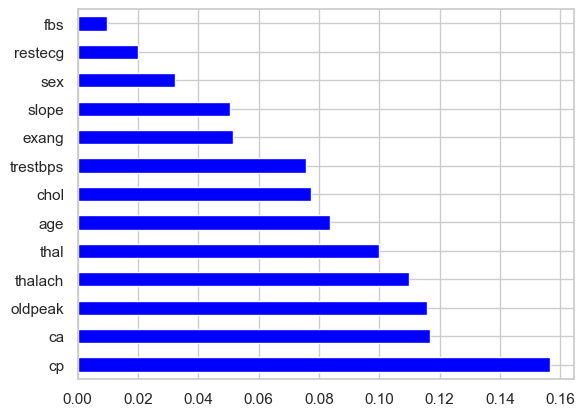

In [68]:
# plotting horizontal bar graph for importance
index= df.columns[:-1]
importance = pd.Series(rfc.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

insight:cp, ca, thal, oldpeak, and thalach are  most significant variable

### Random Forest -- gini 

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc1 = RandomForestClassifier(criterion = 'gini',n_estimators = 400)
rfc1.fit(x_train, y_train)
y_pred_train_rfc = rfc1.predict(x_train)
Train_acc = accuracy_score(y_train, y_pred_train_rfc)
y_pred_test_rfc = rfc1.predict(x_test)
Test_acc = accuracy_score(y_test, y_pred_test_rfc)
print(f'Train_Accuracy :{Train_acc.round(2)*100} %, \nTest_Accuracy :{Test_acc.round(2)*100} %')

Train_Accuracy :100.0 %, 
Test_Accuracy :100.0 %


In [70]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfc1, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rfc1, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())


0.9869788106630211

0.9226153846153847


## XG BOOST

In [71]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train_xb = xgb.predict(x_train)
y_pred_test_xb = xgb.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Trainging Accuracy Score :", accuracy_score(y_train, y_pred_train_xb))
print("****************"*10)
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test_xb))

Trainging Accuracy Score : 1.0
****************************************************************************************************************************************************************
Test Accuracy Score : 0.9883268482490273


In [73]:
# Cross Validation approach - K-Fold Method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
test_accuracy = cross_val_score(xgb, x_test, y_test, cv=10)

print("Training Avg Accuracy", training_accuracy.mean())
print()
print("Test Avg Accuracy", test_accuracy.mean())

Training Avg Accuracy 0.9882946001367052

Test Avg Accuracy 0.9029230769230769


## Votting Classifier -- Hard Voting

In [74]:
# Model building
estimators = [('XGB',xgb),('KNN',classifier),('RandomForestClassifier_gini',rfc),('RandomForestClassifier_entropy',rfc1)]
from sklearn.ensemble import VotingClassifier
voting_hard1 = VotingClassifier(estimators = estimators, voting='hard')
voting_hard1.fit(x_train, y_train)


VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('KNN', KNeighborsClassifier(n_neighbors=13)),
                             ('RandomForestClassifier_gini',
                              RandomForestClassifier(n_estimators=400)),
                             ('RandomForestClassifier_entropy',
                              RandomForestClassifier(n_estimators=400))])

In [75]:
#Prediction
y_pred_train_voting = voting_hard1.predict(x_train)
y_pred_test_voting = voting_hard1.predict(x_test)

In [76]:
#Accuracy
print("Training Accuracy - voting_hard :", accuracy_score(y_train, y_pred_train_voting))
print("*************"*5)
print("Test Accuracy - voting_hard :", accuracy_score(y_test, y_pred_test_voting))

Training Accuracy - voting_hard : 1.0
*****************************************************************
Test Accuracy - voting_hard : 1.0


In [77]:
# Cross Validation
from sklearn.model_selection import cross_val_score
v_train_accuracy = cross_val_score(voting_hard1, x_train, y_train, cv=10, scoring='accuracy')
v_test_accuracy = cross_val_score(voting_hard1, x_test, y_test, cv=10, scoring='accuracy')
print(np.round(np.mean(v_train_accuracy),2))
print()
print(np.round(np.mean(v_test_accuracy),2))

0.99

0.91


## Votting Classifier -- Soft Voting

In [78]:
# Model building
estimators = [('XGB',xgb),('KNN',classifier),('RandomForestClassifier_gini',rfc),('RandomForestClassifier_entropy',rfc1)]
voting_soft = VotingClassifier(estimators = estimators, voting='soft')
voting_soft.fit(x_train, y_train)


VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('KNN', KNeighborsClassifier(n_neighbors=13)),
                             ('RandomForestClassifier_gini',
                              RandomForestClassifier(n_estimators=400)),
                             ('RandomForestClassifier_entropy',
                              RandomForestClassifier(n_estimators=400))],
                 voting='soft')

In [79]:
#Prediction
y_pred_train_voting = voting_soft.predict(x_train)
y_pred_test_voting = voting_soft.predict(x_test)

In [80]:
#Accuracy
print("Training Accuracy - voting_soft :", accuracy_score(y_train, y_pred_train_voting))
print("*************"*5)
print("Test Accuracy - voting_soft :", accuracy_score(y_test, y_pred_test_voting))

Training Accuracy - voting_soft : 1.0
*****************************************************************
Test Accuracy - voting_soft : 1.0


In [81]:
# Cross Validation
from sklearn.model_selection import cross_val_score
v_train_accuracy = cross_val_score(voting_soft, x_train, y_train, cv=10, scoring='accuracy')
v_test_accuracy = cross_val_score(voting_soft, x_test, y_test, cv=10, scoring='accuracy')
print(np.round(np.mean(v_train_accuracy),2))
print()
print(np.round(np.mean(v_test_accuracy),2))

0.99

0.91


In [82]:
# Random Forest gini giving the best result with test accuracy of 92% accuracy

### Model Saving

In [83]:
import joblib
joblib.dump(rfc1,'heart_model.pkl')
print('modelSaved')

modelSaved
